<a href="https://colab.research.google.com/github/wakilahmadhamidi/Heart_Disease_Detection/blob/main/Coronary_Artery_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coronary Artery Disease Prediction Model

**Importing Required ML Libraries**

In [5]:
import pandas as pd #read file
import numpy as np # matrix mul
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset file (Combined Dataset)**

In [6]:
data = pd.read_csv("/content/Combined_Dataset.csv")

**Displaying the first 5 rows**

In [7]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


**Displaying the last 5 rows**

In [8]:
data.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


**Displaying Information about the Dataset**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


**Checking for Null Values (0 indicates there is no null value)**

In [10]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

**Displaying some Basic Statistics of the Dataset**

**For example there are 1190 total entries (rows), min age is 28, max is 77 and so on**

In [11]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


**Dataset Dimensionality (Rows, Columns)**

In [12]:
data.shape

(1190, 12)

**How many patients have CAD and how many don't ?**

(1 = Have, 0 = Don't Have)

In [13]:
data.target.value_counts()

1    629
0    561
Name: target, dtype: int64

**Complete Statistical Description**

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


**How many Male & Female Patients have Positive or Negative CAD?**

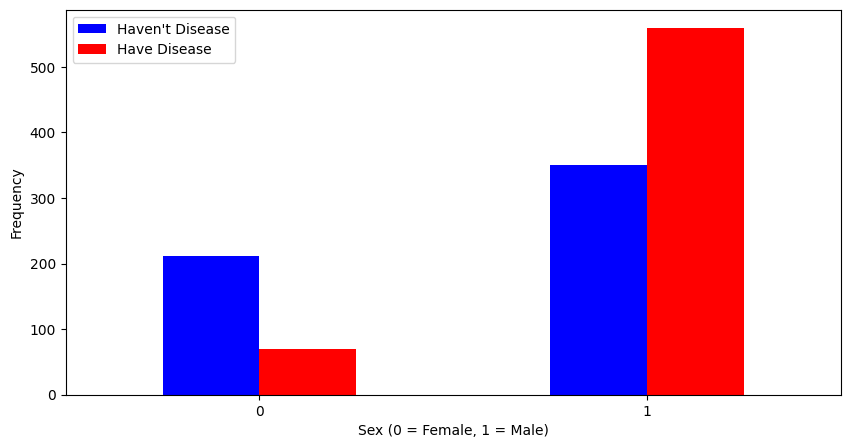

In [15]:
pd.crosstab(data.sex, data.target).plot(kind="bar",figsize=(10,5),color=['blue','red' ])

plt.xlabel('Sex (0 = Female, 1 = Male)') # X-Label

plt.xticks(rotation=0) # Get or set the current tick locations and labels of the x-axis.

plt.legend(["Haven't Disease", "Have Disease"]) # legend = Index

plt.ylabel('Frequency') # X-Label

plt.show() # Help to show our diagram

**The numbers of outliers which are present in each attribute**

In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

((data < (Q1 - 1.5 * IQR)) | (data < (Q3 - 1.5 * IQR))).sum()

age                    108
sex                    281
chest pain type        282
resting bp s            74
cholesterol            192
fasting blood sugar      0
resting ecg              0
max heart rate          92
exercise angina          0
oldpeak                  7
ST slope                 1
target                   0
dtype: int64

**The Distribution of Continuous values**

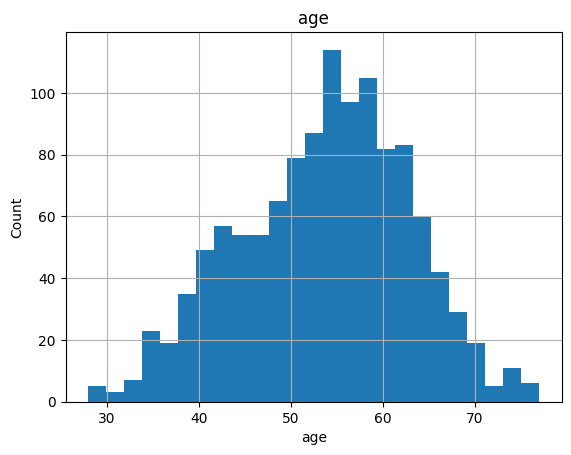

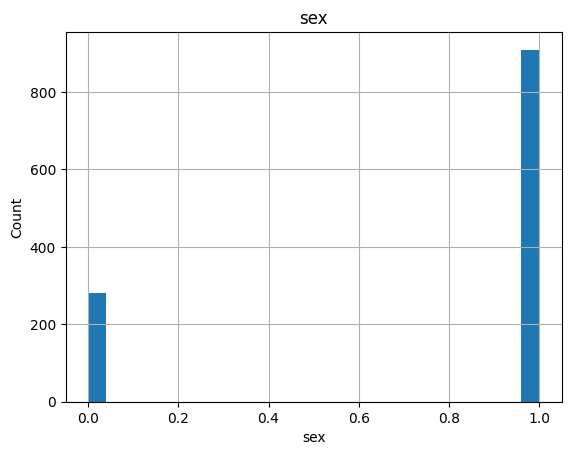

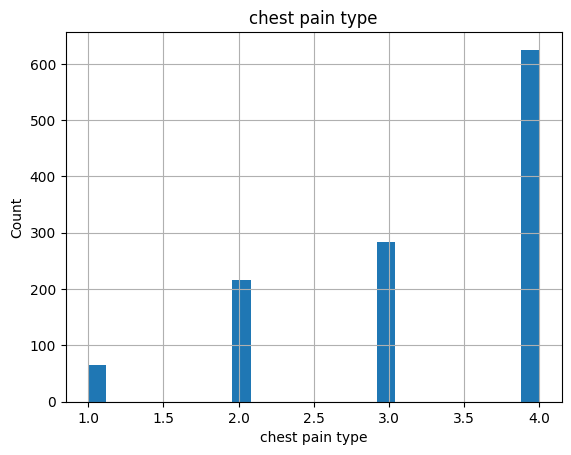

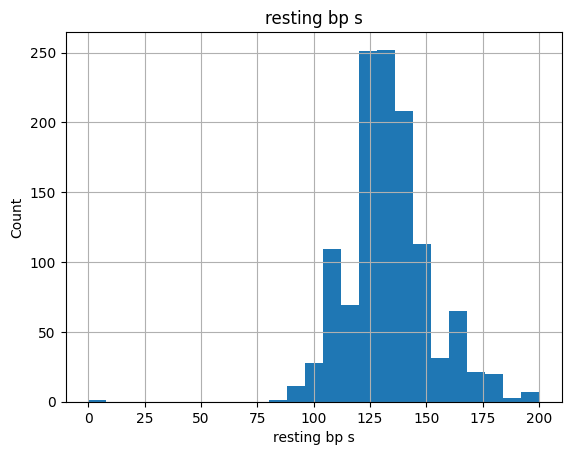

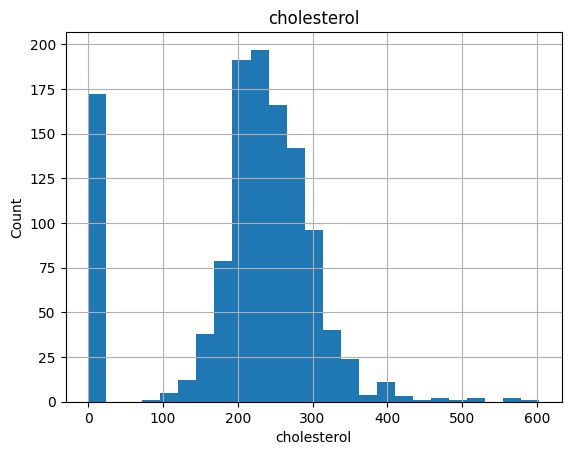

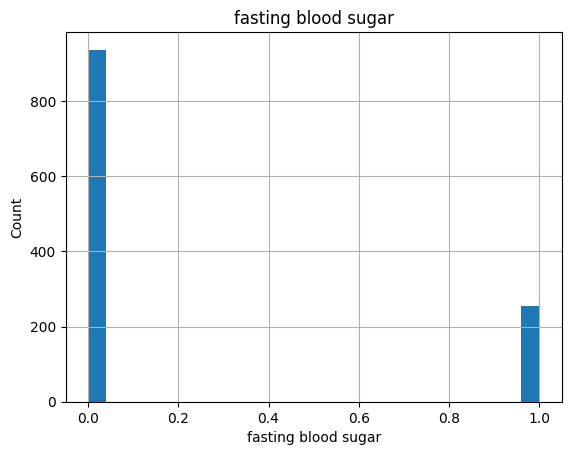

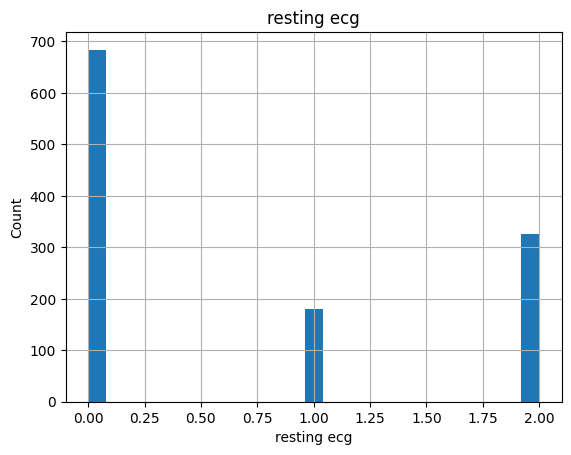

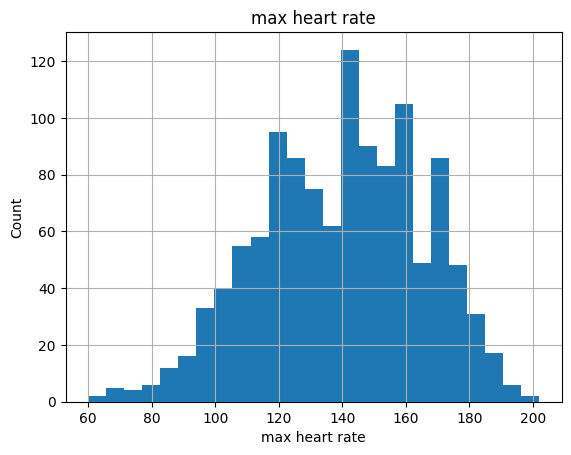

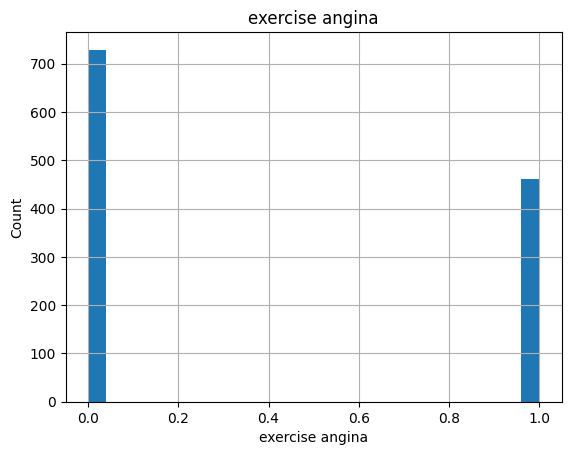

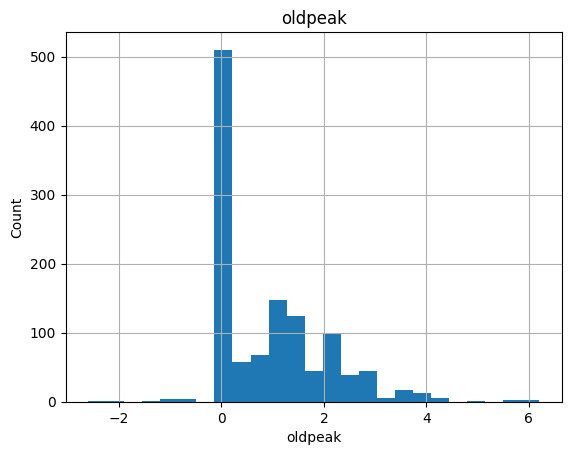

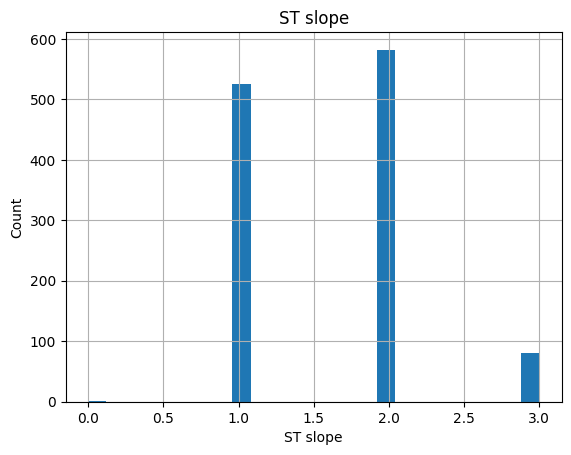

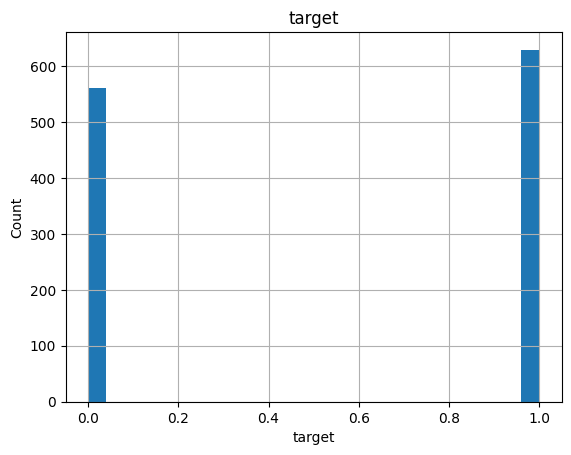

In [17]:
for feature in data:
  dataset = data.copy()
  dataset[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

**Analyzing Outliers with a Box Plot**

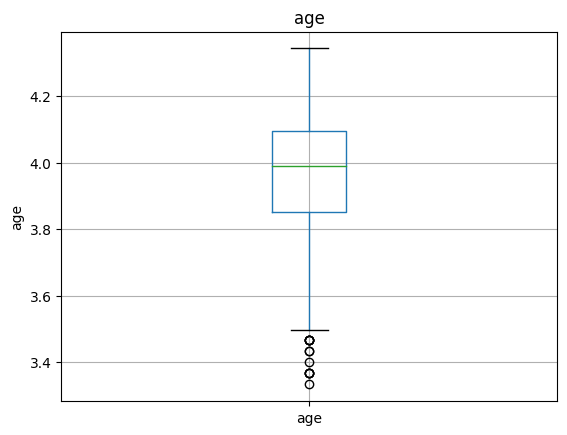

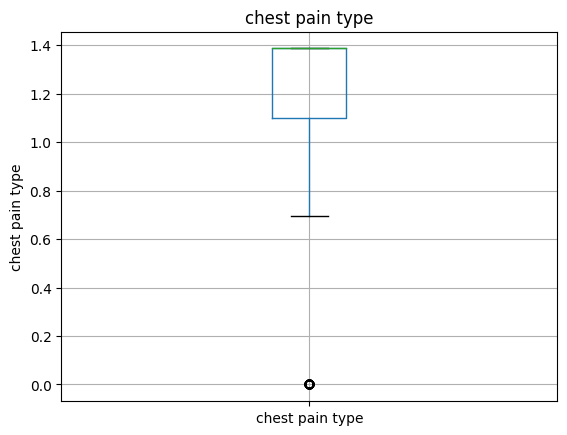

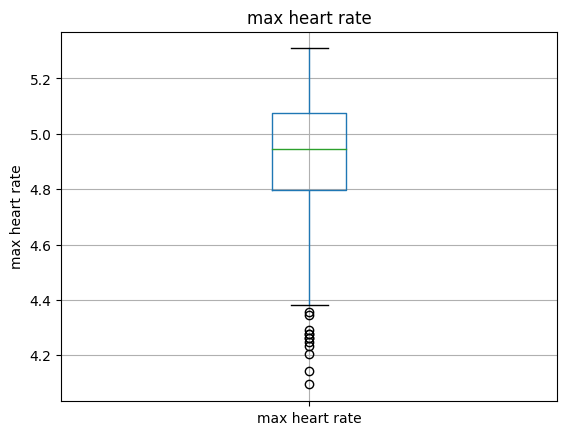

In [18]:
for feature in data:
  dataset = data.copy()

  if 0 in dataset[feature].unique():
    pass
  else:
    dataset[feature] = np.log(dataset[feature])
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Detecting Outliers using z_score (z = (x-μ)/σ)

In [19]:
outliers = []
def detect_outliers(values):
  Threshold = 3
  mean_val = np.mean(values)
  std_val = np.std(values)

  for i in values:
    z_score = (i-mean_val)/std_val
    if np.abs(z_score) > Threshold:
      outliers.append(i)
  return outliers

out = detect_outliers(data['age'])
out

[]

In [20]:
outliers = []
def detect_outliers(values):
  Threshold = 3
  mean_val = np.mean(values)
  std_val = np.std(values)

  for i in values:
    z_score = (i-mean_val)/std_val
    if np.abs(z_score) > Threshold:
      outliers.append(i)
  return outliers

out = detect_outliers(data['resting bp s'])
out

[190, 200, 200, 200, 0, 190, 200, 192, 200, 192]

In [21]:
outliers = []
def detect_outliers(values):
  Threshold = 3
  mean_val = np.mean(values)
  std_val = np.std(values)

  for i in values:
    z_score = (i-mean_val)/std_val
    if np.abs(z_score) > Threshold:
      outliers.append(i)
  return outliers

out = detect_outliers(data['cholesterol'])
out

[518, 529, 603, 564, 564]

In [22]:
outliers = []
def detect_outliers(values):
  Threshold = 3
  mean_val = np.mean(values)
  std_val = np.std(values)

  for i in values:
    z_score = (i-mean_val)/std_val
    if np.abs(z_score) > Threshold:
      outliers.append(i)
  return outliers

out = detect_outliers(data['max heart rate'])
out

[63, 60]

**The correlation between variables or attributes which causes CAD The most**

**For example here cholesterol is the leading cause of CAD**

<Axes: >

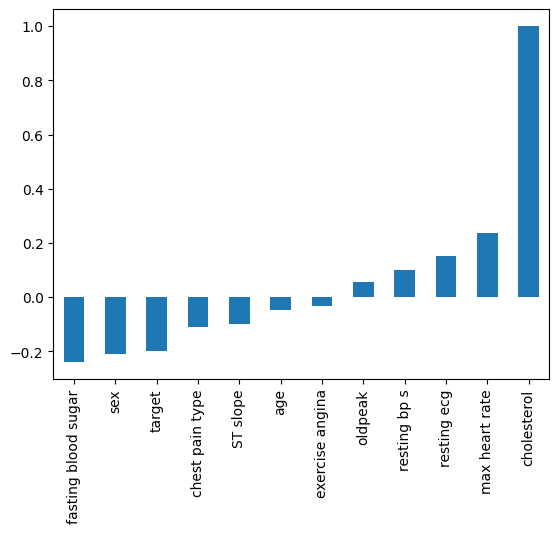

In [23]:
data.corr()['cholesterol'].sort_values().plot(kind='bar')

**The correlation between features (Heat Chart)**

**For example the age in Y-axis in X-axis will have the maximum correlation that's why it's dark in color (Red)**

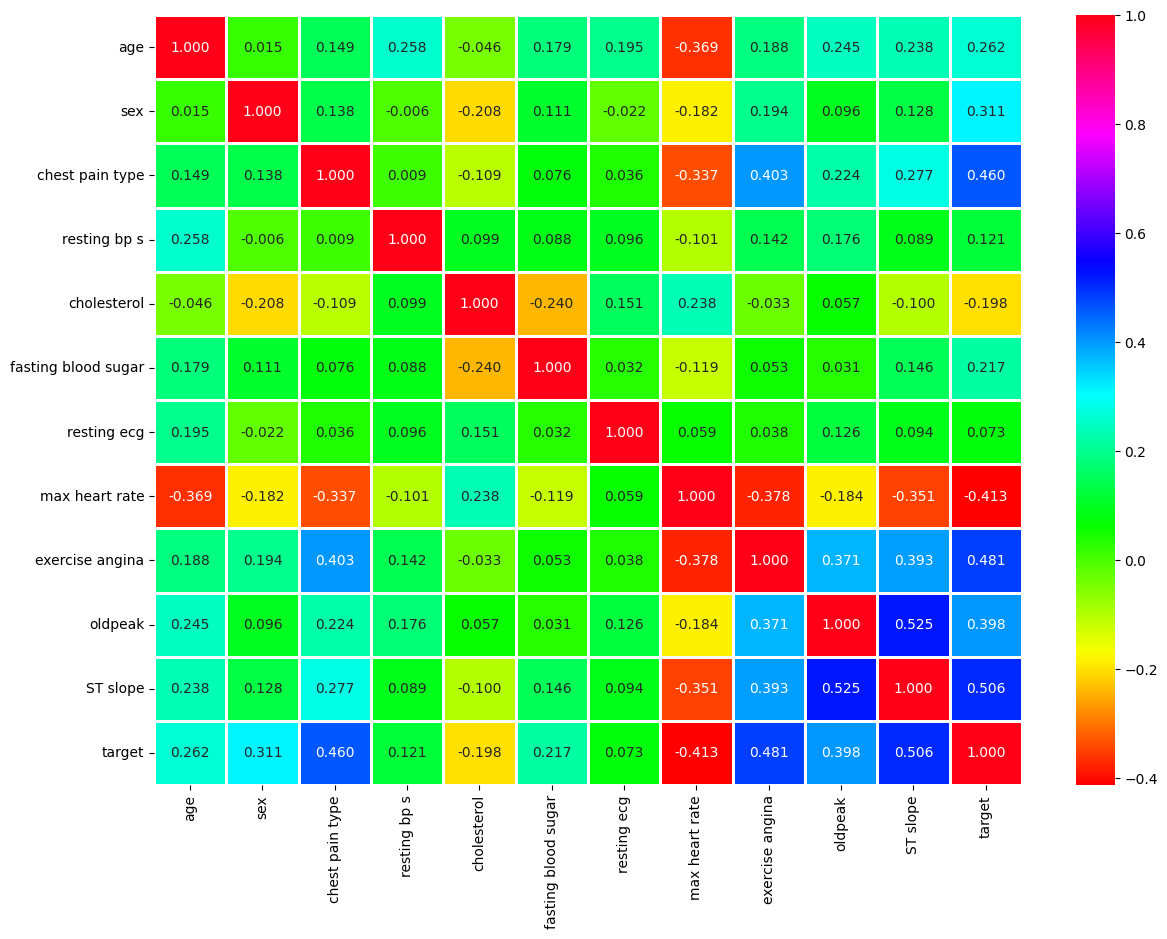

In [24]:
plt.figure(figsize=(14,10)) # Help to set figure size

sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)

plt.ylim(12,0) # show us the exact number of values we want

plt.show()

**Heart Disease Frequency for Different Age classes of patients**

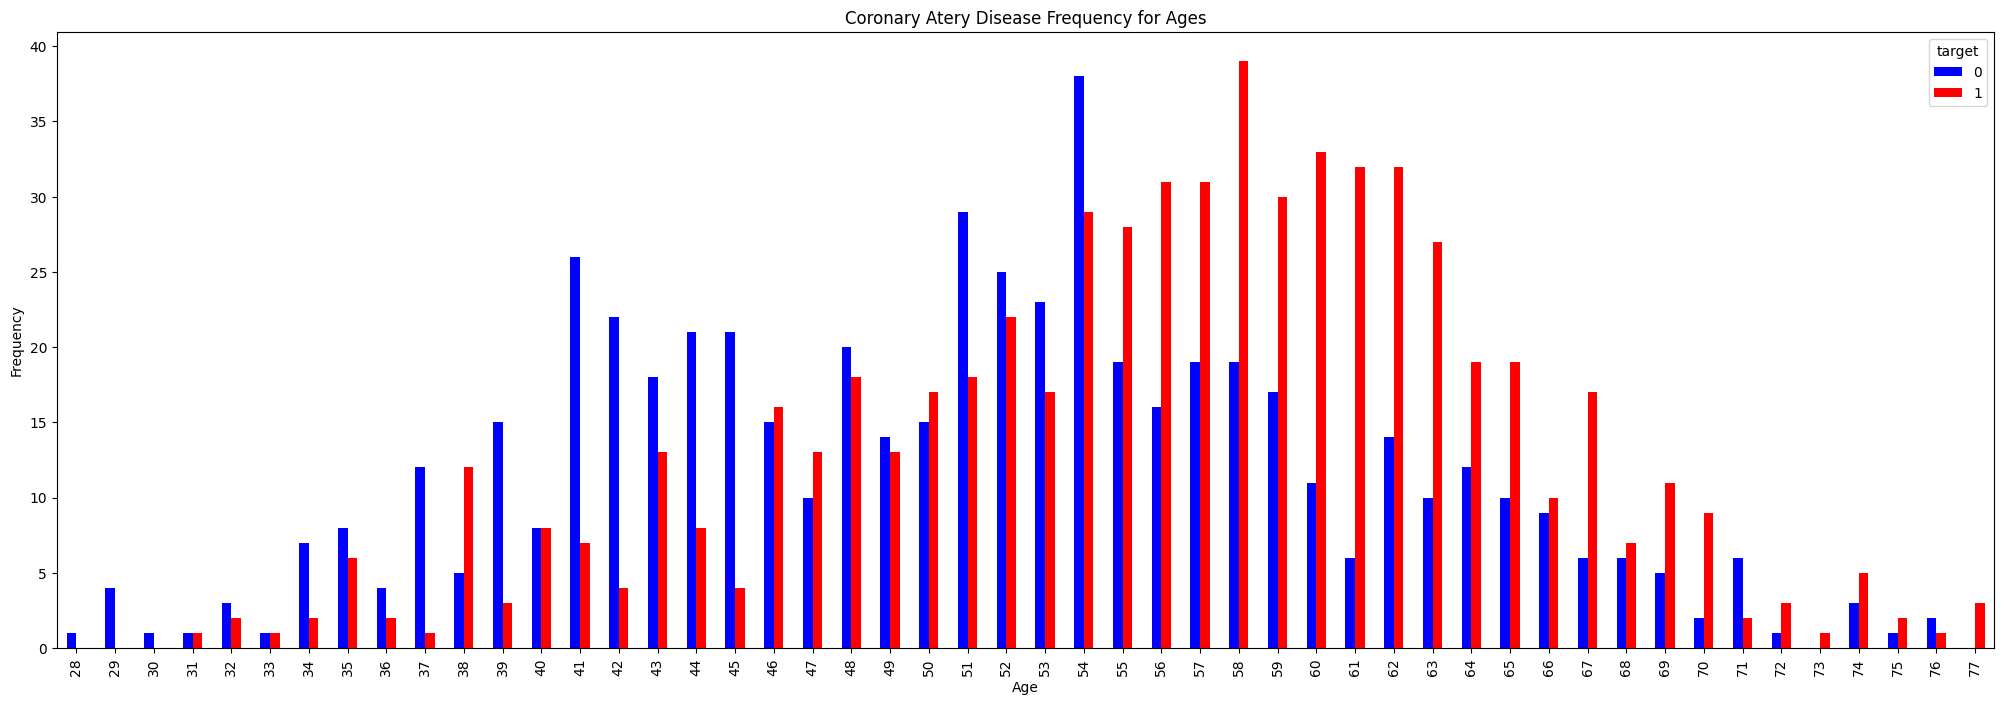

In [69]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(25,8),color=['blue','red' ])
plt.title('Coronary Atery Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

**1) Logistic Regression Algorithm (LR)**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are your feature matrices and target vectors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1200)
logreg.fit(X_train, y_train)
lr_predictions = logreg.predict(X_test)

accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8613445378151261


In [30]:
print(confusion_matrix(y_test,lr_predictions))

[[ 90  17]
 [ 16 115]]


**2) Support Vector Machines Algorithm (SVM)**

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your feature matrices and target vectors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.8487394957983193


In [32]:
print(confusion_matrix(y_test,svm_predictions))

[[ 88  19]
 [ 17 114]]


**3) K-Nearest Neighbors Algorithm (KNN)**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your feature matrices and target vectors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {accuracy}")


KNN Accuracy: 0.6848739495798319


In [34]:
print(confusion_matrix(y_test,knn_predictions))

[[68 39]
 [36 95]]


**4) Decision Tree Algorithm (DT)**

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your feature matrices and target vectors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.8991596638655462


In [36]:
print(confusion_matrix(y_test,dt_predictions))

[[ 99   8]
 [ 16 115]]


**5) Random Forest Algorithm (RF)**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your feature matrices and target vectors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9453781512605042


In [38]:
print(confusion_matrix(y_test,rf_predictions))

[[ 98   9]
 [  4 127]]


**6) Naive Bayes Algorithm (NB)**

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming X_train, X_test, y_train, y_test are your data splits
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_predictions = nb.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, nb_predictions))

Accuracy: 0.8571428571428571


In [40]:
print(confusion_matrix(y_test,nb_predictions))

[[ 89  18]
 [ 16 115]]


**7) Gradient Boosting Classifier Algorithm (GBC)**

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming X_train, X_test, y_train, y_test are your data splits
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

gbc_predictions = gbc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, gbc_predictions))

Accuracy: 0.9159663865546218


In [42]:
print(confusion_matrix(y_test,gbc_predictions))

[[ 96  11]
 [  9 122]]


**Saving the Model**

In [43]:
# RANDOM FOREST ALGORITHM GAVES US THE BEST RESULT, SO WE CHOOSE IT

import joblib
joblib.dump(rf,"CAD Model.pkl")

['CAD Model.pkl']

**Model Testing**

In [44]:
# Testing our model performance
Model = joblib.load('CAD Model.pkl')
Model.predict([[55,0,2,160,220,0,1,140,1,1.0,2]])
# Pateint with No CAD

array([0])

In [59]:
# Testing our model performance
Model = joblib.load('CAD Model.pkl')
Model.predict([[45,1,1,110,264,0,0,132,0,1.2,2]])
# Pateint with CAD

array([1])

In [60]:
# Testing our model performance
Model = joblib.load('CAD Model.pkl')
Model.predict([[63,1,1,145,233,1,2,150,0,2.3,3]])
# Pateint with No CAD

array([0])

In [61]:
# Testing our model performance
Model = joblib.load('CAD Model.pkl')
Model.predict([[67,1,4,160,286,0,2,108,1,1.5,2]])
# Pateint with CAD

array([1])

**All Test Cases Passed Successfully with 95% Accuracy**

**All Done**

**Now Some Additional Operations and Statistics**

In [46]:
data['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

In [47]:
bar_font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

Text(0.5, 1.0, 'CAD and Non-CAD patient count')

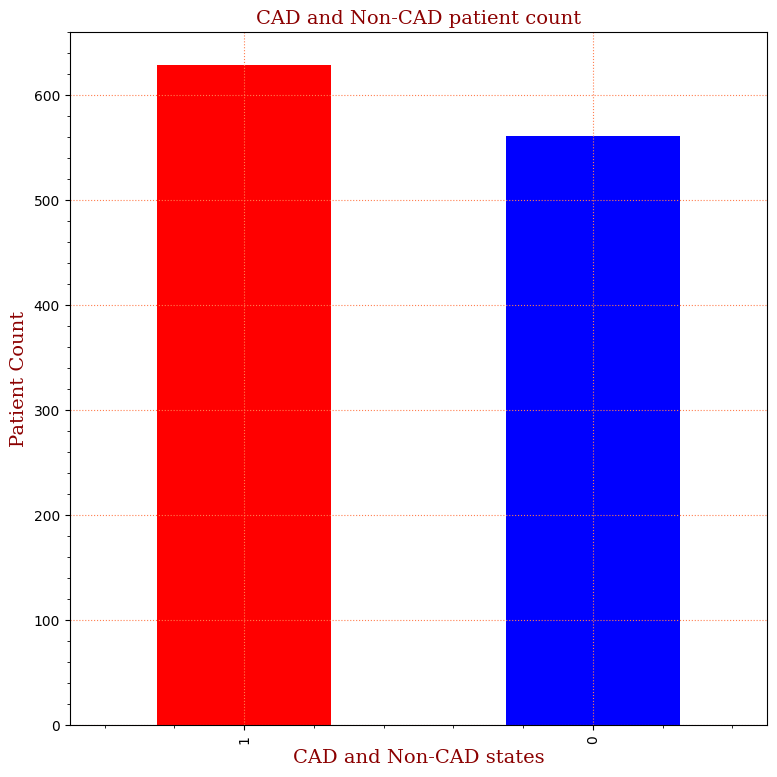

In [71]:
data['target'].value_counts().plot(kind='bar', figsize=(9,9), color= ['red','blue'])
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('CAD and Non-CAD states',fontdict=bar_font)
plt.ylabel('Patient Count',fontdict=bar_font)
plt.title('CAD and Non-CAD patient count',fontdict=bar_font)

**To know the reason why missing value filteration was not performed, because missing values were already not there**

In [49]:
missing_val_font = {'family':'serif',
                   'weight': 'bold',
                   'size': 14,
                   'color':'red'}

Text(0.5, 1.0, 'Post fix - Missing values')

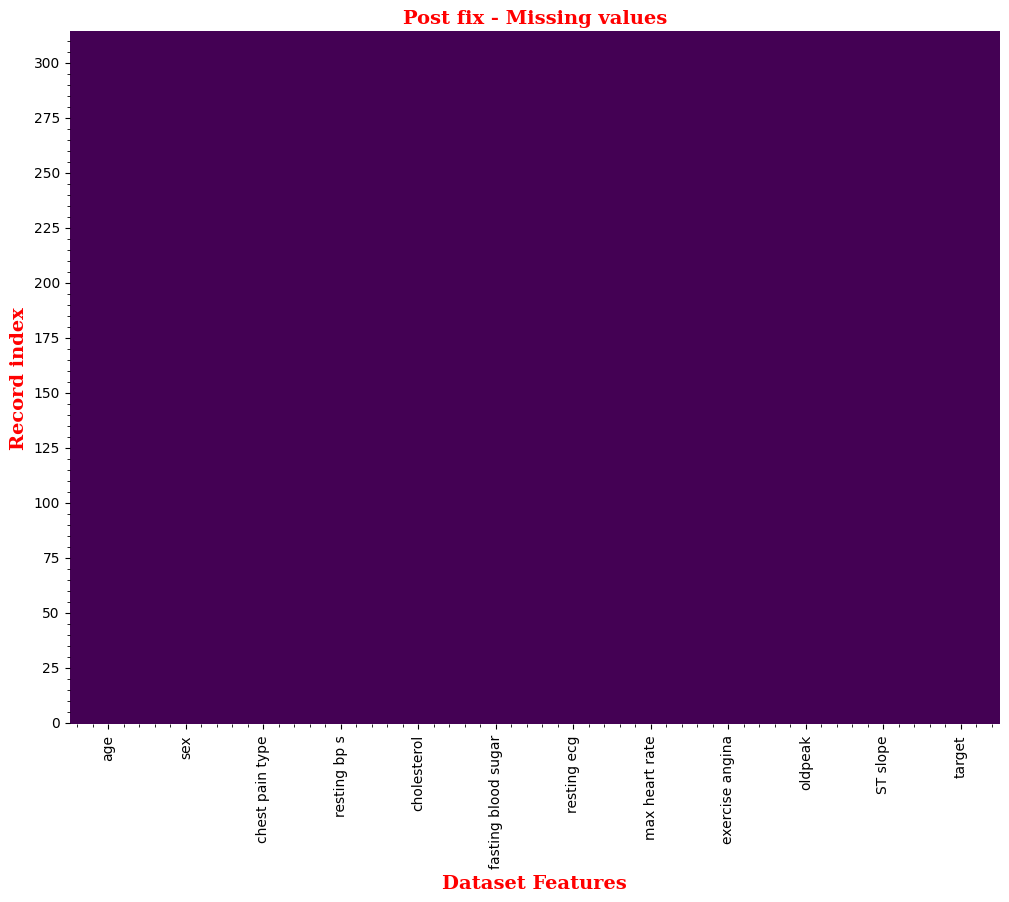

In [50]:
plt.figure(figsize=(12,9))
sns.heatmap(data[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target']].isnull(),cbar=False,cmap='viridis')
plt.minorticks_on()
plt.axis(ymin=0,ymax=315)
plt.xlabel("Dataset Features",fontdict=missing_val_font)
plt.ylabel("Record index",fontdict=missing_val_font)
plt.title("Post fix - Missing values",fontdict=missing_val_font)

**Some Important Questions**

**Question-1: How many people of age group 29-48 have blockage greater than 50%?**

In [74]:
age_grp_29_48 = pd.concat([data[(data['age'] >= 29.0) & (data['age'] < 48.0)][['age','target']].groupby(by='target',axis=0).count(),
           pd.DataFrame({'color':['blue','red']})],axis=1)
age_grp_29_48.reset_index(inplace=True)
age_grp_29_48.columns = ['target','age','color']
age_grp_29_48

,target,age,color
0,0,202,blue
1,1,103,red


Text(0.5, 1.0, 'Heart Disease Result of people from age group 29 - 48')

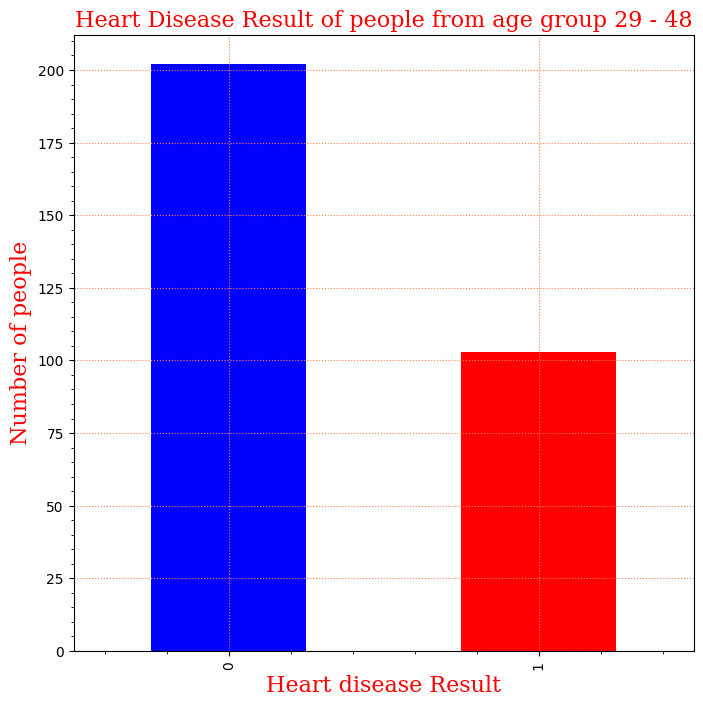

In [75]:
label_style={'family':'serif','color':'red','size':16}
age_grp_29_48.plot(kind='bar',x='target',y='age',figsize=(8,8),color=age_grp_29_48['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Heart disease Result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('Heart Disease Result of people from age group 29 - 48',fontdict=label_style)

**Question-2: How many people of age group 48-56 have blockage greater than 50%?**

In [76]:
age_grp_48_56 = pd.concat([data[(data['age'] >= 48.0) & (data['age'] < 56.0)][['age','target']].groupby(by='target',axis=0).count(),
           pd.DataFrame({'color':['blue','red']})],axis=1)

age_grp_48_56.reset_index(inplace=True)

age_grp_48_56.columns = ['target','age','color']

age_grp_48_56

,target,age,color
0,0,183,blue
1,1,162,red


Text(0.5, 1.0, 'Heart Disease Result of people from age group 48 - 56')

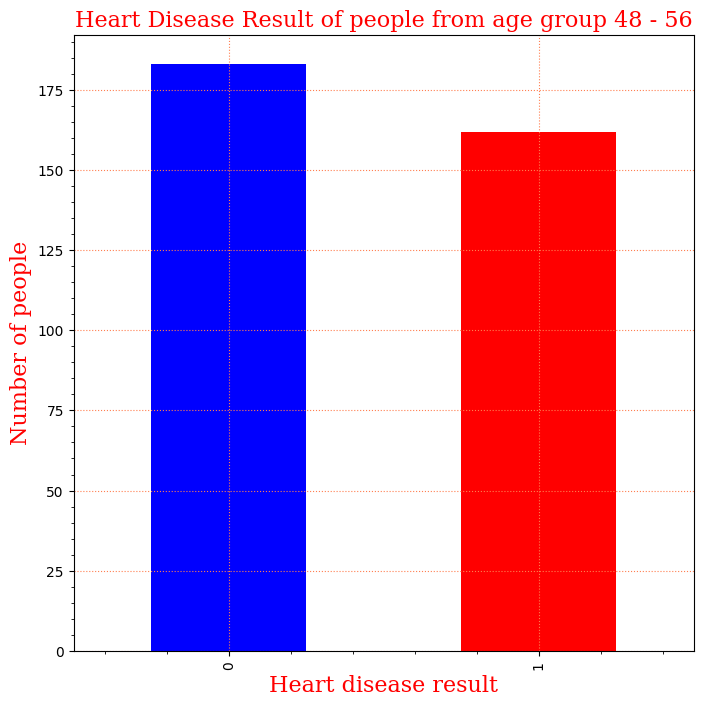

In [77]:
label_style={'family':'serif','color':'red','size':16}
age_grp_48_56.plot(kind='bar',x='target',y='age',figsize=(8,8),color=age_grp_48_56['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Heart disease result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('Heart Disease Result of people from age group 48 - 56',fontdict=label_style)

**Question-3: How many people of age group 56-77 have blockage greater than 50%?**

In [78]:
age_grp_56_77 = pd.concat([data[(data['age'] >= 56.0)][['age','target']].groupby(by='target',axis=0).count(),
           pd.DataFrame({'color':['blue','red']})],axis=1)

age_grp_56_77.reset_index(inplace=True)

age_grp_56_77.columns = ['target','age','color']

age_grp_56_77

,target,age,color
0,0,175,blue
1,1,364,red


Text(0.5, 1.0, 'Heart Disease Result of people from age group 56 - 77')

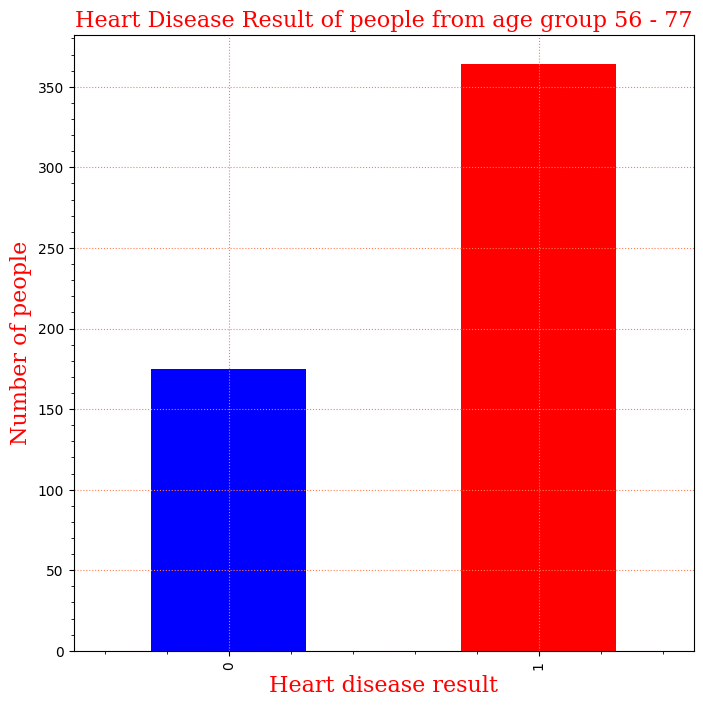

In [79]:
label_style={'family':'serif','color':'red','size':16}
age_grp_56_77.plot(kind='bar',x='target',y='age',figsize=(8,8),color=age_grp_56_77['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Heart disease result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('Heart Disease Result of people from age group 56 - 77',fontdict=label_style)

**Question-4: How many Males and Females have CAD?**

In [80]:
pd.concat([pd.DataFrame(data['sex'].value_counts()),pd.DataFrame({'gender_name':['female','male']})],axis=1)

,sex,gender_name
1,909,male
0,281,female


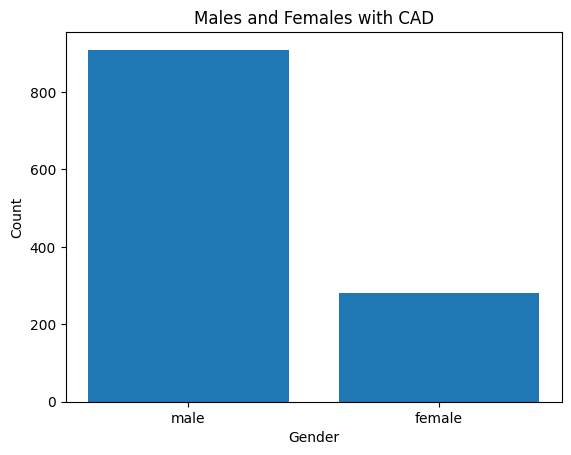

In [81]:
# Assuming 'data' is your DataFrame
data = pd.DataFrame(data)  # Replace ... with your actual data

# Creating a DataFrame as in the given code
gender_counts = pd.concat([pd.DataFrame(data['sex'].value_counts()), pd.DataFrame({'gender_name': ['female', 'male']})], axis=1)

# Plotting the bar chart
plt.bar(gender_counts['gender_name'], gender_counts['sex'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Males and Females with CAD')
plt.show()